# Project diamanten

We gaan de prijs (price) voorspellen aan de hand van de andere kolommen in de diamonds.csv file.<br> 
In het vakjargon is price de **target** en de andere kolommen zijn de **features**.

## Imports van de nodige bibliotheken

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split  # klasse om data te splitsen in een leer- en testset
from sklearn.pipeline import Pipeline                 # klasse voor de data pipeline lib
from sklearn.preprocessing import StandardScaler      # klasse voor het standaardiseren van de data
from sklearn.compose import ColumnTransformer         # klasse om kolommen te transformeren en/of te verwijderen
from sklearn.linear_model import LinearRegression     # klasse voor lineaire fit 
from sklearn.metrics import mean_squared_error        # klasse voor berekenen van RMSE
import numpy as np                                    # klasse voor matrix e.a. berekeningen
from sklearn.preprocessing import PolynomialFeatures  # klasse om hogere machten toe te voegen aan de datapunten
from sklearn.svm import SVR                           # klasse voor Support Vector Machine
from sklearn.tree import DecisionTreeRegressor        # klasse voor Decision Tree
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
                                                      # klasse voor Grid Search combinatie van hyperparemeters 
                                                      # om het model te finetunen. VC staat voor Cross Validation
                                                      # leerset wordt opgesplitst in groepen, 1 om te testen en andere om te leren
from tensorflow.keras.models import Sequential        # klasses voor neurale netwerken
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
import seaborn as snb
import matplotlib.pyplot as plt

## Dataset diamonds.csv opladen

In [84]:
df = pd.read_csv("../data/diamonds.csv")

## Eerste verkenning

In [85]:
df.head()  # eerste 5 records

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Betekenis van de kolommen

***Unnamed***: 0 --> geen betekenis (gaan we verwijderen na controle)<br>
***carat***: gewicht, 1 carat = 0.2 gram<br>
***cut***: juistheid van de slijpwijze<br>
***color***: kleur. Kleurloos (D,E,F) is beter dan geel (K tot Z)<br>
***clarity***: zuiverheid. FL is zuiverst, P het minst zuiver<br>
***depth***: procentuele verhouding hoogte tov diameter (ideaal 59 tot 62%)<br>
***table***: procentuele verhouding diameter bovenste platte vlak tov totale diameter diamant (ideaal 53 tot 60%)<br>
***price***: wat voorspeld moet worden (target)<br>
***x,y,z***: afmetingen van de diamant

## Verwijderen overbodige kolom(men)

In [86]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [87]:
# Unamed: 0 is een overbodige kolom, bevat de rij id.
df = df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Opsplitsen van data in leerset (70%) en testset (30%)

In [88]:
train_set,test_set = train_test_split(df,test_size=0.3,random_state=42)
# random_state is randomseed voor de random functie
print('aantal entries in train_set:', len(train_set))
print('aantal entries in test_set: ', len(test_set))
print('stukje inhoud train_set:')
train_set.head()

aantal entries in train_set: 37758
aantal entries in test_set:  16182
stukje inhoud train_set:


,carat,cut,color,clarity,depth,table,price,x,y,z
19497,1.21,Ideal,H,VVS2,61.3,57.0,8131,6.92,6.87,4.23
31229,0.31,Ideal,E,VS2,62.0,56.0,756,4.38,4.36,2.71
22311,1.21,Ideal,E,VS1,62.4,57.0,10351,6.75,6.83,4.24
278,0.81,Ideal,F,SI2,62.6,55.0,2795,5.92,5.96,3.72
6646,0.79,Ideal,I,VVS2,61.7,56.0,4092,5.94,5.95,3.67


## Per kolom het aantal lege cellen

In [89]:
# snelle manier om lege cellen te detecteren
print('aantal entries in train_set:',len(train_set))  
train_set.info()

aantal entries in train_set: 37758
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37758 entries, 19497 to 15795
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    37758 non-null  float64
 1   cut      37758 non-null  object 
 2   color    37758 non-null  object 
 3   clarity  37758 non-null  object 
 4   depth    37758 non-null  float64
 5   table    37758 non-null  float64
 6   price    37758 non-null  int64  
 7   x        37758 non-null  float64
 8   y        37758 non-null  float64
 9   z        37758 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.2+ MB


In [90]:
# berekenen procentueel aantal lege cellen per kolom
cols = train_set.columns  # kolomnamen van train_set ophalen
len_train = len(train_set)
for c in cols:
    print(c,':',100*train_set[c].isna().sum()/len_train,'%')

carat : 0.0 %
cut : 0.0 %
color : 0.0 %
clarity : 0.0 %
depth : 0.0 %
table : 0.0 %
price : 0.0 %
x : 0.0 %
y : 0.0 %
z : 0.0 %


In [91]:
cols = test_set.columns  # kolomnamen van test_set ophalen
len_test = len(test_set)
for c in cols:
    print(c,':',100*test_set[c].isna().sum()/len_test,'%')

carat : 0.0 %
cut : 0.0 %
color : 0.0 %
clarity : 0.0 %
depth : 0.0 %
table : 0.0 %
price : 0.0 %
x : 0.0 %
y : 0.0 %
z : 0.0 %


***Geen lege cellen aanwezig*** (zeer brave dataset)

## Algemene info en histogrammen van de train_set

In [92]:
train_set.describe()

,carat,depth,table,price,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.799763,61.744923,57.461129,3951.495312,5.735377,5.738825,3.541152
std,0.475556,1.428630,2.226637,4006.428295,1.122262,1.146605,0.711444
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,956.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,2404.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5366.750000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


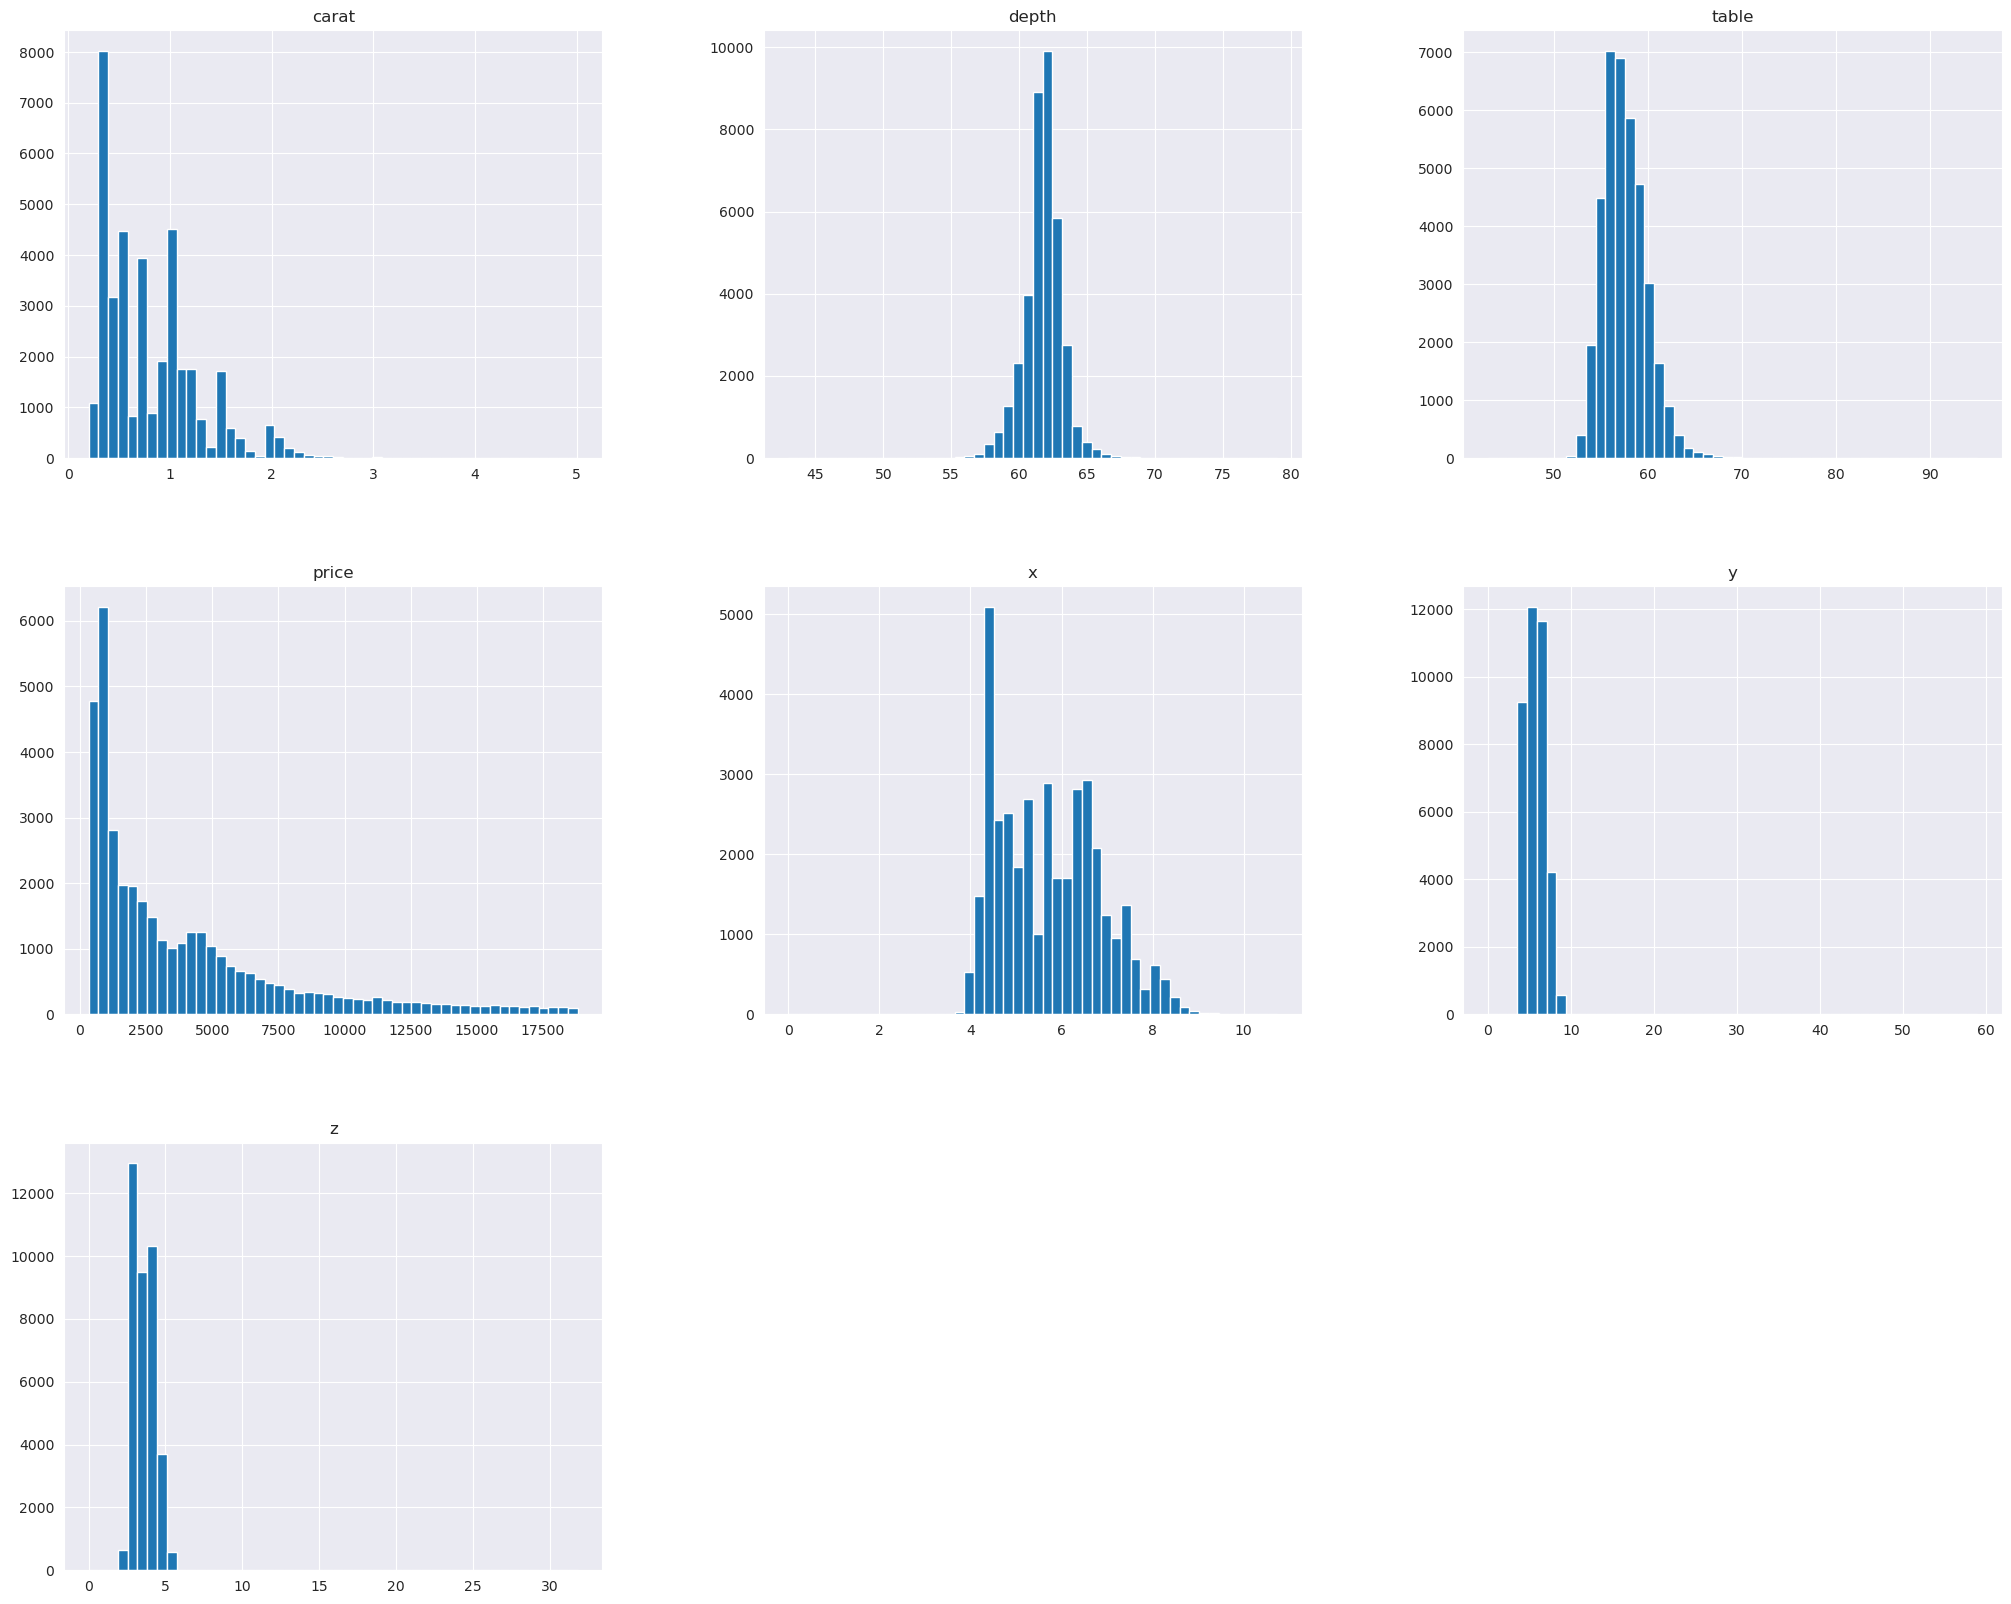

In [93]:
train_set.hist(figsize=(25,20),bins=50);

## Correlatie tussen features en price

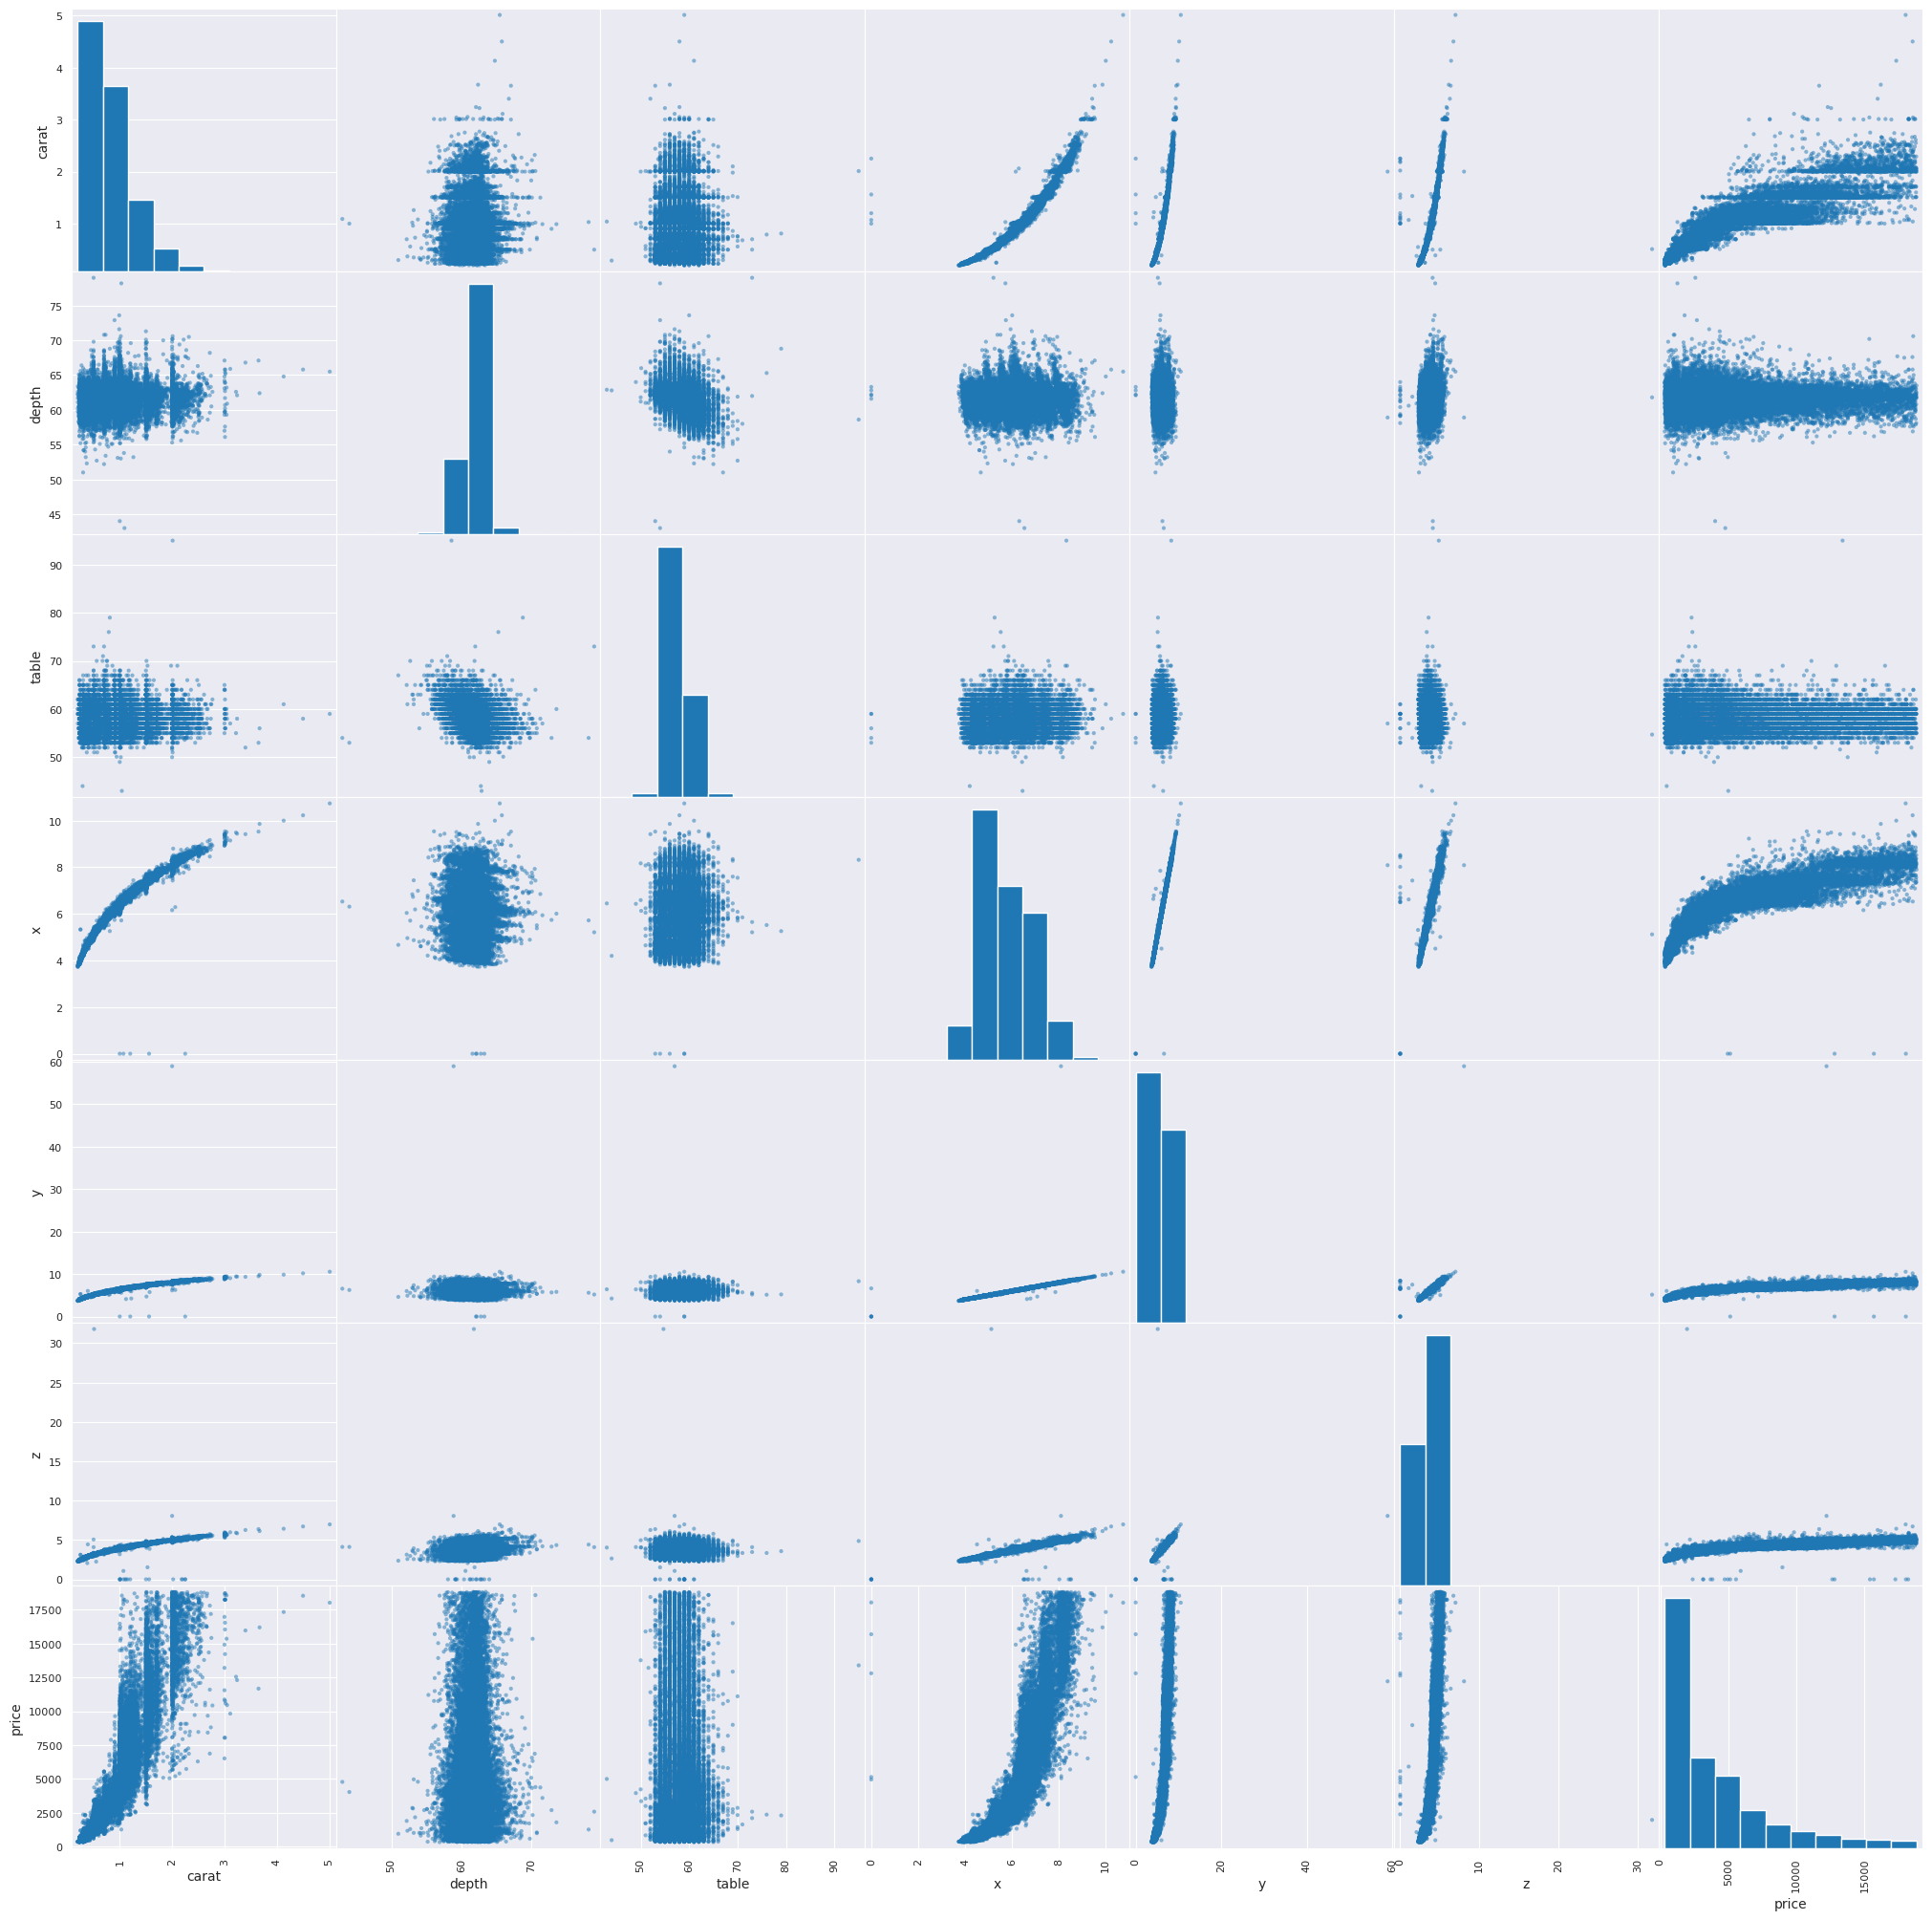

In [94]:
# belangrijkste features en target (price)
feats = ['carat','depth','table','x','y','z','price']
pd.plotting.scatter_matrix(train_set[feats],figsize=(25,25));

In [95]:
train_set.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.033516,0.177176,0.921729,0.974924,0.949135,0.946185
depth,0.033516,1.000000,-0.297302,-0.004225,-0.021104,-0.026131,0.098415
table,0.177176,-0.297302,1.000000,0.122367,0.192339,0.180855,0.146346
price,0.921729,-0.004225,0.122367,1.000000,0.884821,0.863298,0.855583
x,0.974924,-0.021104,0.192339,0.884821,1.000000,0.971878,0.963348
y,0.949135,-0.026131,0.180855,0.863298,0.971878,1.000000,0.942313
z,0.946185,0.098415,0.146346,0.855583,0.963348,0.942313,1.000000


## Maken van de data Pipeline

In [96]:
def preprocess(dataset,features,target,learnedProcess=None):
    # uit de dataset de features halen
    X = dataset[features]
    # uit de dataset de target halen
    y = dataset[target]
    # object voor het transformeren van numerieke kolommen.
    # in steps komt een rij daarin tuples. Iedere tuple bevat een transformatie functie.
    # het eerste elem van de tuple is een naam (zelf te kiezen), het tweede elem is de transformatie functie
    X_res = None
    if learnedProcess == None: # indien learnedProcess niet ingevuld is moet er geleerd worden met leer of trainset
        num_transform = Pipeline(steps=[('scaler',StandardScaler())])
        # object voor kolommen te transformeren
        # in tranformers zit een lijst van tuples met de transformers.
        # het eerste elem van de tuple is een naam (zelf te kiezen), het tweede elem is de transformatie (num_transform)
        # het derde elem zijn de kolommen waarop de transformatie moet gebeuren 
        coltransform = ColumnTransformer(transformers=[('num',num_transform,features)])
        # proces pipeline maken met daarin de transofrmaties
        process = Pipeline(steps=[('coltrans',coltransform)])
        # is geleerd, learnedProcess wordt ingevuld
        learnedProcess = process
        # voer de transformatie uit
        # hier wordt de dataset getransformeerd naa de kolommen die we willen behouden
        # en het standaardiseren van de data (x-gem)/stdev
        X_res = process.fit_transform(X)
    else:
        # de geleerde transfrormaties worden uitgevoerd op test, validatie en nieuwe waarden
        X_res = learnedProcess.transform(X)
    # dataframe omzetten naar lijst
    y=list(y)
    # retourneren van de getransformeerde data en proces
    return X_res,y,learnedProcess
    

### Leerset door de data Pipeline sturen 

In [97]:
features = ['carat','depth','table','x','y','z']
target = 'price'

dataProcess = None

train_X,train_y,dataProcess = preprocess(train_set,features,target,dataProcess)
print('features train_set:')
print(train_X)
print('target')
print(train_y[:20])
print(dataProcess)

features train_set:
[[ 0.86265905 -0.31143736 -0.20709927  1.05558107  0.98655568  0.9682529 ]
 [-1.02988861  0.17854897 -0.65621302 -1.20773446 -1.20254423 -1.16827649]
 [ 0.86265905  0.45854116 -0.20709927  0.90409932  0.95166963  0.98230901]
 ...
 [-0.987832   -1.01141784  0.24201448 -1.10971685 -1.11532909 -1.1823326 ]
 [ 0.21078152  0.73853335  0.69112823  0.35163648  0.25394854  0.39195221]
 [ 0.7154609  -0.94141979  0.24201448  0.96647416  0.91678357  0.79957952]]
target
[8131, 756, 10351, 2795, 4092, 738, 7056, 4034, 7641, 2671, 1170, 4015, 5640, 1786, 675, 1061, 505, 2809, 1179, 3112]
Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])]))]

### Testset opsplitsen in test- en validatieset en deze door de Pipeline sturen

In [98]:
test_set,valid_set = train_test_split(test_set,test_size=0.4,random_state=42)
# random_state is randomseed voor de random functie
print('aantal entries in test_set:  ', len(test_set))
print('aantal entries in valid_set: ', len(valid_set))
print('stukje inhoud test_set:')
test_set.head()

# transformeren van de testset
test_X,test_y,_ = preprocess(test_set,features,target,dataProcess)
print('features test_set:')
print(test_X)
print('target')
print(test_y[:20])

# transformeren van de validatieset
valid_X,valid_y,_ = preprocess(valid_set,features,target,dataProcess)
print('features valid_set:')
print(valid_X)
print('target')
print(valid_y[:20])

aantal entries in test_set:   9709
aantal entries in valid_set:  6473
stukje inhoud test_set:
features test_set:
[[-0.54623754 -0.03144517 -1.10532676 -0.44141503 -0.40888649 -0.42330243]
 [-0.92474708  0.03855287 -0.20709927 -1.01169925 -1.02811396 -0.99960312]
 [-0.56726585 -0.38143541 -1.10532676 -0.4681471  -0.42632952 -0.47952688]
 ...
 [-1.00886031 -0.10144322 -1.10532676 -1.163181   -1.10660758 -1.12610815]
 [ 1.36733842 -2.20138465  4.73315196  1.52784769  1.38774531  1.12287015]
 [ 0.42106459 -2.27138269 -1.10532676  0.65459997  0.59408757  0.32167163]]
target
[1187, 810, 1857, 628, 752, 1819, 1438, 1235, 2065, 1043, 4474, 934, 8538, 1020, 2153, 13849, 15185, 2405, 696, 3391]
features valid_set:
[[-0.56726585 -0.10144322 -0.65621302 -0.45032572 -0.4786586  -0.46547077]
 [-0.56726585  0.03855287 -0.65621302 -0.4681471  -0.48738011 -0.46547077]
 [-0.20978463 -1.64140027  2.03846947 -0.02261255  0.01846767 -0.1984046 ]
 ...
 [ 0.46312121 -0.03144517 -0.65621302  0.59222513  0.655

## Leren van modellen

### Model Lineaire Regressie

In [99]:
# lineaire regressor object maken
lin_reg = LinearRegression()
# fitten van de features (train_X)
lin_reg.fit(train_X,train_y)
# lineaire vergelijking
# voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
y_pred = lin_reg.predict(train_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
lin_mse = mean_squared_error(y_pred,train_y)
# bepalen van RMSE (Root Mean Square Error)
lin_rmse = np.sqrt(lin_mse)
print('RMSE:',lin_rmse)

RMSE: 1504.3117920723394


<h4>coefficiënten en offset van het model</h4>

In [100]:
print('coefficiënten van de vgl:', lin_reg.coef_)
print('offset van de vgl:', lin_reg.intercept_)

coefficiënten van de vgl: [ 5039.25634425  -285.98184814  -230.38400775 -1396.66436436
    37.0862656     32.10913907]
offset van de vgl: 3951.4953122517104


<p>price = 5039*carat -286*depth - 230*table - 1396*x + 37*y + 32*z + 3951</p>
<p>lineair model is <b>onvoldoende</b> om prijs te voorspellen</p>

### Model Polynoom (kromme)

In [101]:
# Polyfeature object maken
poly_feats = PolynomialFeatures(degree=2,include_bias=False)
# toevoegen van datapunten tot de 2de macht
# x1 en x2 zijn features -> er wordt bijgemaakt : x1*x1, x2.x2 en x1*x2
train_X_poly = poly_feats.fit_transform(train_X)
print('Leerset na polyfeatures transformatie:')
print(train_X_poly)

# door een lineaire regressor sturen
# lineaire regressor object maken
lin_reg = LinearRegression()
# fitten van de features (train_X)
lin_reg.fit(train_X_poly,train_y)
# lineaire vergelijking
# voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
y_pred = lin_reg.predict(train_X_poly)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
lin_mse = mean_squared_error(y_pred,train_y)
# bepalen van RMSE (Root Mean Square Error)
lin_rmse = np.sqrt(lin_mse)
print('RMSE:',lin_rmse)

Leerset na polyfeatures transformatie:
[[ 0.86265905 -0.31143736 -0.20709927 ...  0.97329211  0.9552354
   0.93751367]
 [-1.02988861  0.17854897 -0.65621302 ...  1.44611262  1.40490415
   1.36486995]
 [ 0.86265905  0.45854116 -0.20709927 ...  0.90567508  0.93483365
   0.96493099]
 ...
 [-0.987832   -1.01141784  0.24201448 ...  1.24395898  1.31868995
   1.39791038]
 [ 0.21078152  0.73853335  0.69112823 ...  0.06448986  0.09953569
   0.15362653]
 [ 0.7154609  -0.94141979  0.24201448 ...  0.84049212  0.73304137
   0.63932741]]
RMSE: 1405.0499467505401


In [102]:
for d in range(2,7):
    # Polyfeature object maken
    poly_feats = PolynomialFeatures(degree=d,include_bias=False)
    train_X_poly = poly_feats.fit_transform(train_X)
    # door een lineaire regressor sturen
    # lineaire regressor object maken
    lin_reg = LinearRegression()
    # fitten van de features (train_X)
    lin_reg.fit(train_X_poly,train_y)
    # lineaire vergelijking
    # voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
    y_pred = lin_reg.predict(train_X_poly)
    # bepalen van Mean Square Error van de voorspelde tov de echte waarden
    lin_mse = mean_squared_error(y_pred,train_y)
    # bepalen van RMSE (Root Mean Square Error)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE voor degree:',d,'is',lin_rmse)   

RMSE voor degree: 2 is 1405.0499467505401
RMSE voor degree: 3 is 1373.077760376369
RMSE voor degree: 4 is 1360.44342855186
RMSE voor degree: 5 is 1345.9485231744186
RMSE voor degree: 6 is 1322.9119002428927


### Model SVM (Support Vector Machine)

In [103]:
#svm_rbf_reg = SVR(kernel='rbf',C=1000,epsilon=1)
# kernel is transformator voor de data
# C is de gevoeligheid van het model. Hoe groter, hoe minder gevoelig
# epsilon bepaalt de breedte van de 'straat'
# nu wordt het model geleerd
#svm_rbf_reg.fit(train_X,train_y)
# voorspellen met behulp van geleerd model
#y_pred = svm_rbf_reg.predict(train_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
#svm_mse = mean_squared_error(y_pred,train_y)
# bepalen van RMSE (Root Mean Square Error)
#svm_rmse = np.sqrt(svm_mse)
#print('RMSE:',svm_rmse)

### Model Decision Tree als regressor

In [104]:
tree_reg = DecisionTreeRegressor()
# trainen van het model
tree_reg.fit(train_X,train_y)
# voorspellen met behulp van geleerd model
y_pred = tree_reg.predict(train_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_mse = mean_squared_error(y_pred,train_y)
# bepalen van RMSE (Root Mean Square Error)
tree_rmse = np.sqrt(tree_mse)
print('RMSE:',tree_rmse)

RMSE: 124.80514563668693


<h4>Testen resultaat van decision tree</h4>

In [105]:
# testen van testset
y_pred = tree_reg.predict(test_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_test_mse = mean_squared_error(y_pred,test_y)
# bepalen van RMSE (Root Mean Square Error)
tree_test_rmse = np.sqrt(tree_test_mse)
print('RMSE:',tree_test_rmse)

RMSE: 1853.2885988788394


In [106]:
# test van validatieset
y_pred = tree_reg.predict(valid_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_valid_mse = mean_squared_error(y_pred,valid_y)
# bepalen van RMSE (Root Mean Square Error)
tree_valid_rmse = np.sqrt(tree_valid_mse)
print('RMSE:',tree_valid_rmse)

RMSE: 1910.8121474500927


<p>Decision Tree model fit te goed (overfit). Resultaat train set is veel beter dan test en validatie set. Om goed te zijn moeten alle sets ongeveer dezelfde (lage) RMSE hebben</p>

<h4>Verschillende combinaties van de hyperparameters : max_dept en min_sample_leaf uitproberen met Grid Search Cross Validation</h4>

In [107]:
# max_depth = maximale diepte van de tree
# min_samples_leaf = minimum aantal samples in de 'linker' en 'rechter' klasse van een node in de tree.
# hoge getallen zijn stabieler dan lage getallen
# hyper_params_grid : combinaties van de te testen hyperparameters. Per dictionary een andere combinatie.
#    1ste combinatie: 4x max_dept en 5x min_samples_leaf
#    2de combinatie: 3s max_depth
#    3de combinatie: 6x min_samples_leaf
#    In totaal: 20+3+6 = 29 testen
hyper_params_grid = [{'max_depth':[10,20,30,40],'min_samples_leaf':[2,4,8,16,32]},
                     {'max_depth':[16,32,64]},{'min_samples_leaf':[2,4,8,16,32,64]}]
# combinaties uitvoeren
tree_reg_gs = DecisionTreeRegressor()
# maken van het GridSearchCV object
# param1: regressor
# param2: grid search combinaties
# param3: cv=5 -> leerset opdelen in 5 groepen, 4 om te leren 1 om te testen. Opdeling 5x uitvoeren.
grid = GridSearchCV(tree_reg_gs,hyper_params_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
# leren en testen van de verschillende modellen
grid.fit(train_X,train_y)
# ophalen resultaten
# met zip wordt de gemiddelde test score gecombineerd met combinatie hyperparameters en met de for lus overlopen
res = grid.cv_results_
for mean_score,hyper_params in zip(res['mean_test_score'],res['params']):
    print(np.sqrt(-mean_score),hyper_params)

1424.5567572803575 {'max_depth': 10, 'min_samples_leaf': 2}
1421.1453546678524 {'max_depth': 10, 'min_samples_leaf': 4}
1413.994376537486 {'max_depth': 10, 'min_samples_leaf': 8}
1406.8621705144878 {'max_depth': 10, 'min_samples_leaf': 16}
1395.6735115931972 {'max_depth': 10, 'min_samples_leaf': 32}
1699.89297988743 {'max_depth': 20, 'min_samples_leaf': 2}
1605.0191456959442 {'max_depth': 20, 'min_samples_leaf': 4}
1511.3535268610137 {'max_depth': 20, 'min_samples_leaf': 8}
1442.5261544059817 {'max_depth': 20, 'min_samples_leaf': 16}
1410.316234647474 {'max_depth': 20, 'min_samples_leaf': 32}
1764.1506645549946 {'max_depth': 30, 'min_samples_leaf': 2}
1621.4630529172416 {'max_depth': 30, 'min_samples_leaf': 4}
1514.5617215567117 {'max_depth': 30, 'min_samples_leaf': 8}
1442.8072828298082 {'max_depth': 30, 'min_samples_leaf': 16}
1410.377858744398 {'max_depth': 30, 'min_samples_leaf': 32}
1771.5812361634385 {'max_depth': 40, 'min_samples_leaf': 2}
1621.8079062735637 {'max_depth': 40, 'm

<h4>Testen van test en validatieset met als hyperparameter min_samples_leaf=64</h4>

In [108]:
# Eerst laten leren met de vermelde hyperparameter
tree_1= DecisionTreeRegressor(min_samples_leaf=64)
tree_1.fit(train_X,train_y)

# RMSE van leerset
pred_y_train = tree_1.predict(train_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_1_train_mse = mean_squared_error(pred_y_train,train_y)
# bepalen van RMSE (Root Mean Square Error)
tree_1_train_rmse = np.sqrt(tree_1_train_mse)
print('RMSE leerset:',tree_1_train_rmse)

# RMSE van testset
pred_y_test = tree_1.predict(test_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_1_test_mse = mean_squared_error(pred_y_test,test_y)
# bepalen van RMSE (Root Mean Square Error)
tree_1_test_rmse = np.sqrt(tree_1_test_mse)
print('RMSE testset:',tree_1_test_rmse)

# RMSE van validatieset
pred_y_valid = tree_1.predict(valid_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_1_valid_mse = mean_squared_error(pred_y_valid,valid_y)
# bepalen van RMSE (Root Mean Square Error)
tree_1_valid_rmse = np.sqrt(tree_1_valid_mse)
print('RMSE validatieset:',tree_1_valid_rmse)

RMSE leerset: 1332.5740216498207
RMSE testset: 1349.8500878373977
RMSE validatieset: 1384.9651118435434


<h4>Bepalen mbv Decision Tree wat de belangrijkste features zijn</h4>

In [109]:
print('gewicht per feature')
print(tree_1.feature_importances_)

gewicht per feature
[0.69139342 0.00267902 0.00428873 0.00229387 0.29660345 0.00274151]


<p>De features carat (gewicht: 0.69) en y (gewicht: 0.29) zijn de belangrijkste features.</p>

## Opdracht: testen dataset met enkel de features carat en y

### Leerset door dataPipeline sturen maar enkel met features carat en y

In [110]:
features = ['carat','y']
target = 'price'

dataProcess_2 = None

train_X_2,train_y_2,dataProcess_2 = preprocess(train_set,features,target,dataProcess_2)
print('features train_set:')
print(train_X_2)
print('target')
print(train_y_2[:20])
print(dataProcess_2)

features train_set:
[[ 0.86265905  0.98655568]
 [-1.02988861 -1.20254423]
 [ 0.86265905  0.95166963]
 ...
 [-0.987832   -1.11532909]
 [ 0.21078152  0.25394854]
 [ 0.7154609   0.91678357]]
target
[8131, 756, 10351, 2795, 4092, 738, 7056, 4034, 7641, 2671, 1170, 4015, 5640, 1786, 675, 1061, 505, 2809, 1179, 3112]
Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'y'])]))])


### Lineaire regressie 

In [111]:
# lineaire regressor object maken
lin_reg_2 = LinearRegression()
# fitten van de features (train_X)
lin_reg_2.fit(train_X_2,train_y_2)
# lineaire vergelijking
# voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
y_pred_2 = lin_reg_2.predict(train_X_2)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
lin_mse_2 = mean_squared_error(y_pred_2,train_y_2)
# bepalen van RMSE (Root Mean Square Error)
lin_rmse_2 = np.sqrt(lin_mse_2)
print('RMSE:',lin_rmse_2)

RMSE: 1546.8472644698793


### Polynoom transformatie met lineaire fit

In [112]:
for d in range(2,7):
    # Polyfeature object maken
    poly_feats = PolynomialFeatures(degree=d,include_bias=False)
    train_X_poly = poly_feats.fit_transform(train_X_2)
    # door een lineaire regressor sturen
    # lineaire regressor object maken
    lin_reg = LinearRegression()
    # fitten van de features (train_X)
    lin_reg.fit(train_X_poly,train_y_2)
    # lineaire vergelijking
    # voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
    y_pred = lin_reg.predict(train_X_poly)
    # bepalen van Mean Square Error van de voorspelde tov de echte waarden
    lin_mse = mean_squared_error(y_pred,train_y_2)
    # bepalen van RMSE (Root Mean Square Error)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE voor degree:',d,'is',lin_rmse)   

RMSE voor degree: 2 is 1466.7944236080807
RMSE voor degree: 3 is 1426.5935477607713
RMSE voor degree: 4 is 1413.8569880863113
RMSE voor degree: 5 is 1402.5717196439814
RMSE voor degree: 6 is 1396.038377584779


## Meerlagen neuraal netwerk (MLP = Multi Layer Perceptron)

### MLP: 2 inputs (carat en y), hidden layer 8 neurons en 1 output (target=price)

<h4>Leerset door dataPipeLine sturen</h4>

In [113]:
features = ['carat','y']
target = 'price'

dataProcess_2_mlp = None

train_X_2_mlp,train_y_2_mlp,dataProcess_2_mlp = preprocess(train_set,features,target,dataProcess_2_mlp)
print('features train_set:')
print(train_X_2_mlp)
print('target')
print(train_y_2_mlp[:20])
print(dataProcess_2_mlp)

features train_set:
[[ 0.86265905  0.98655568]
 [-1.02988861 -1.20254423]
 [ 0.86265905  0.95166963]
 ...
 [-0.987832   -1.11532909]
 [ 0.21078152  0.25394854]
 [ 0.7154609   0.91678357]]
target
[8131, 756, 10351, 2795, 4092, 738, 7056, 4034, 7641, 2671, 1170, 4015, 5640, 1786, 675, 1061, 505, 2809, 1179, 3112]
Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'y'])]))])


<h4>Functie om het neurale netwerk te maken</h4>

In [114]:
def model_1_hidden(num_inputs,num_nodes_hidden,num_outputs,activ='relu',optim='adam'):
    # param1: aantal input features
    # param2: aantal neuronen in de 2de laag (=eerste verborgen laag)
    # param3: aantal output nodes, hier 1, nl. de target price
    # param4: drempel functie in het neuron
    # param5: methode om de gewichten te bepalen
    
    # maken van het nmodel
    model = Sequential()
    
    # inputlaag
    # kernel_initializer = normal, gewichten krijgen bij init een willekeurige waarde
    model.add(Dense(num_inputs,input_shape=(num_inputs,),kernel_initializer='normal',activation=activ))
 
    # verborgen laag (laag 2)
    model.add(Dense(num_nodes_hidden,kernel_initializer='normal',activation=activ))
    
    # outputlaag (laatste laag)
    model.add(Dense(num_outputs,kernel_initializer='normal'))
    
    # compileren van het model
    model.compile(loss="mean_squared_error",optimizer=optim)
    
    return model


<h4>Maken van de keras regressor</h4>

In [115]:
#keras_reg = KerasRegressor(model=model_1_hidden(2,5,1),epochs=25,batch_size=5,verbose=0)
# Om de ideale berichten te berekenen worden er een aantal willekeurige punten van de error functie, loss of cost
# functie genomen (nl 5 (batch_size)) en wordt daarmee de afgeleide bepaald. 
# Aan de hand van de afgeleide probeert men naar het minimum van de error, cost of loss functie te gaan.
# Dit proces wordt 50x (epochs) herhaald.
#results = cross_val_score(keras_reg,train_X_2_mlp,train_y_2_mlp,cv=5,n_jobs=1,scoring="neg_mean_squared_error")
# bepalen van score met behulpt van cross validatie. cv=10 dit betekent dat de leerset in 10 stukken wordt
# opgedeeld : 9 om te leren en 1 om te testen
# n_jobs hier 1, dit betekent dat er maar 1 proces wordt opgestart. Indien hoger wordt er parallel gewerkt indien mogelijk
#print("Resultaat: %.2f (%.2f) RMSE" % (np.sqrt(-results.mean()),results.std()))
# resultaten apart
#for r in results:
#    print(np.sqrt(-r))

## Target transformeren met log2

### dataPipeLine aanpassen

In [116]:
def preprocess_targetTf(dataset,features,target,learnedProcess=None):
    # uit de dataset de features halen
    X = dataset[features]
    # uit de dataset de target halen
    y = dataset[target]
    # object voor het transformeren van numerieke kolommen.
    # in steps komt een rij daarin tuples. Iedere tuple bevat een transformatie functie.
    # het eerste elem van de tuple is een naam (zelf te kiezen), het tweede elem is de transformatie functie
    X_res = None
    if learnedProcess == None: # indien learnedProcess niet ingevuld is moet er geleerd worden met leer of trainset
        num_transform = Pipeline(steps=[('scaler',StandardScaler())])
        # object voor kolommen te transformeren
        # in tranformers zit een lijst van tuples met de transformers.
        # het eerste elem van de tuple is een naam (zelf te kiezen), het tweede elem is de transformatie (num_transform)
        # het derde elem zijn de kolommen waarop de transformatie moet gebeuren 
        coltransform = ColumnTransformer(transformers=[('num',num_transform,features)])
        # proces pipeline maken met daarin de transofrmaties
        process = Pipeline(steps=[('coltrans',coltransform)])
        # is geleerd, learnedProcess wordt ingevuld
        learnedProcess = process
        # voer de transformatie uit
        # hier wordt de dataset getransformeerd naa de kolommen die we willen behouden
        # en het standaardiseren van de data (x-gem)/stdev
        X_res = process.fit_transform(X)
    else:
        # de geleerde transfrormaties worden uitgevoerd op test, validatie en nieuwe waarden
        X_res = learnedProcess.transform(X)
    # dataframe omzetten naar lijst
    y=list(y)
    y=np.log2(y)
    # retourneren van de getransformeerde data en proces
    return X_res,y,learnedProcess

### Data splitsen in leer- en testset + data door dataPipeLine sturen

In [117]:
train_set_tf,test_set_tf = train_test_split(df,test_size=0.3,random_state=42)
# random_state is randomseed voor de random functie
print('aantal entries in train_set:', len(train_set_tf))
print('aantal entries in test_set: ', len(test_set_tf))
print('stukje inhoud train_set:')
train_set_tf.head()

aantal entries in train_set: 37758
aantal entries in test_set:  16182
stukje inhoud train_set:


,carat,cut,color,clarity,depth,table,price,x,y,z
19497,1.21,Ideal,H,VVS2,61.3,57.0,8131,6.92,6.87,4.23
31229,0.31,Ideal,E,VS2,62.0,56.0,756,4.38,4.36,2.71
22311,1.21,Ideal,E,VS1,62.4,57.0,10351,6.75,6.83,4.24
278,0.81,Ideal,F,SI2,62.6,55.0,2795,5.92,5.96,3.72
6646,0.79,Ideal,I,VVS2,61.7,56.0,4092,5.94,5.95,3.67


In [118]:
dataProcess_tf = None
train_X_tf,train_y_tf,dataProcess_tf = preprocess_targetTf(train_set_tf,['carat','y'],'price',dataProcess_tf)
print('X train set:')
print(train_X_tf)
print('y train set:')
print(train_y_tf[:20])
print(dataProcess_tf)

X train set:
[[ 0.86265905  0.98655568]
 [-1.02988861 -1.20254423]
 [ 0.86265905  0.95166963]
 ...
 [-0.987832   -1.11532909]
 [ 0.21078152  0.25394854]
 [ 0.7154609   0.91678357]]
y train set:
[12.98921708  9.56224242 13.33748253 11.44863257 11.99859043  9.52747701
 12.78463485 11.97799537 12.89954574 11.38316426 10.19229281 11.97118427
 12.46147945 10.80251637  9.39874369 10.05120894  8.98013958 11.45584091
 10.203348   11.60362634]
Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'y'])]))])


### Plots price in functie van carat en/of y

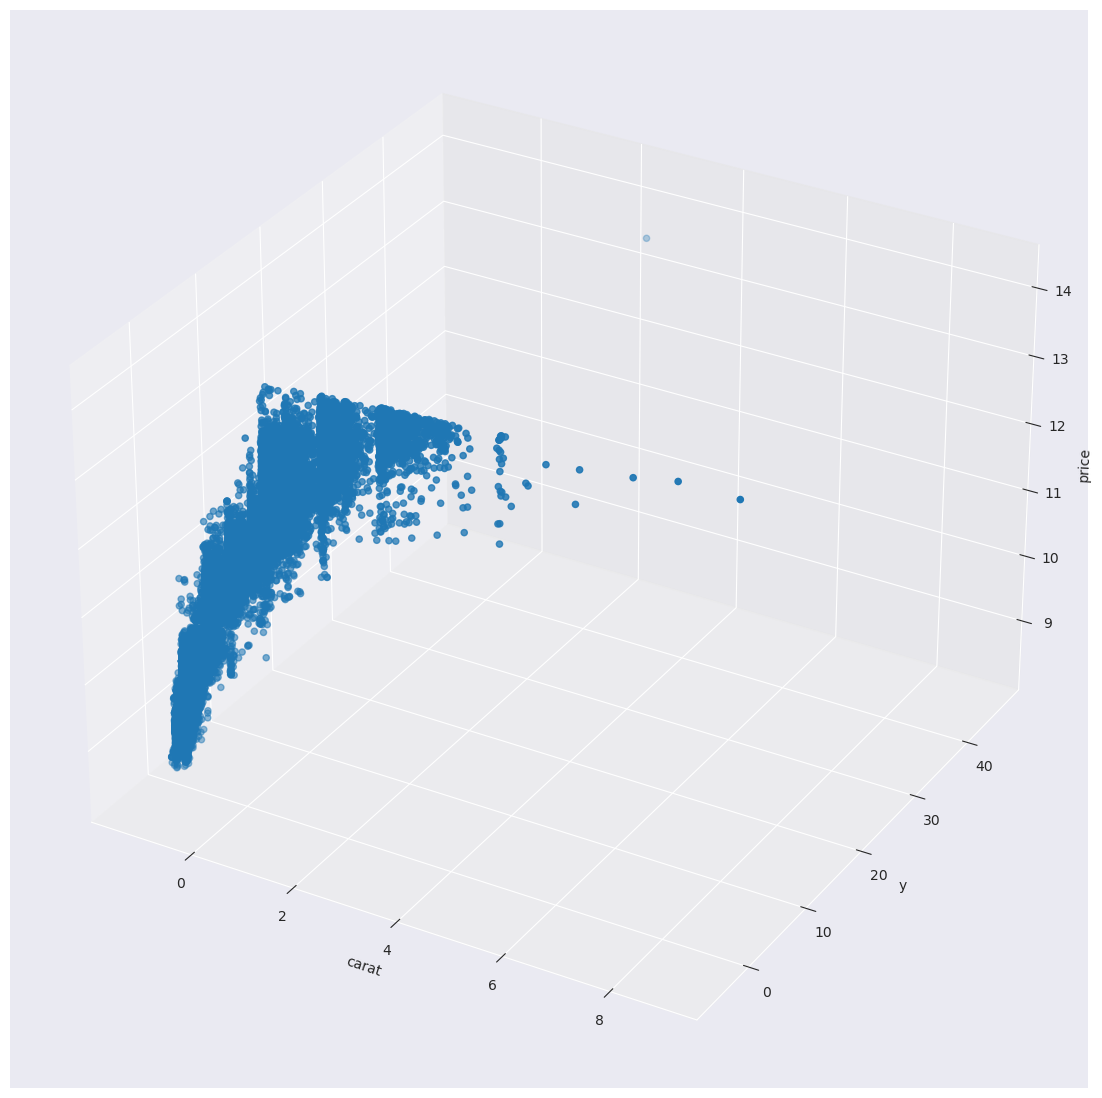

In [119]:
snb.set_style('darkgrid')  # stijl grafiek
plt.figure(figsize=(16,14))
axes = plt.axes(projection='3d')
# 1ste kolom van train set is [:,0], want is een numpy matrix
axes.scatter3D(train_X_tf[:,0],train_X_tf[:,1],train_y_tf)

axes.set_xlabel('carat')
axes.set_ylabel('y')
axes.set_zlabel('price')
plt.show()

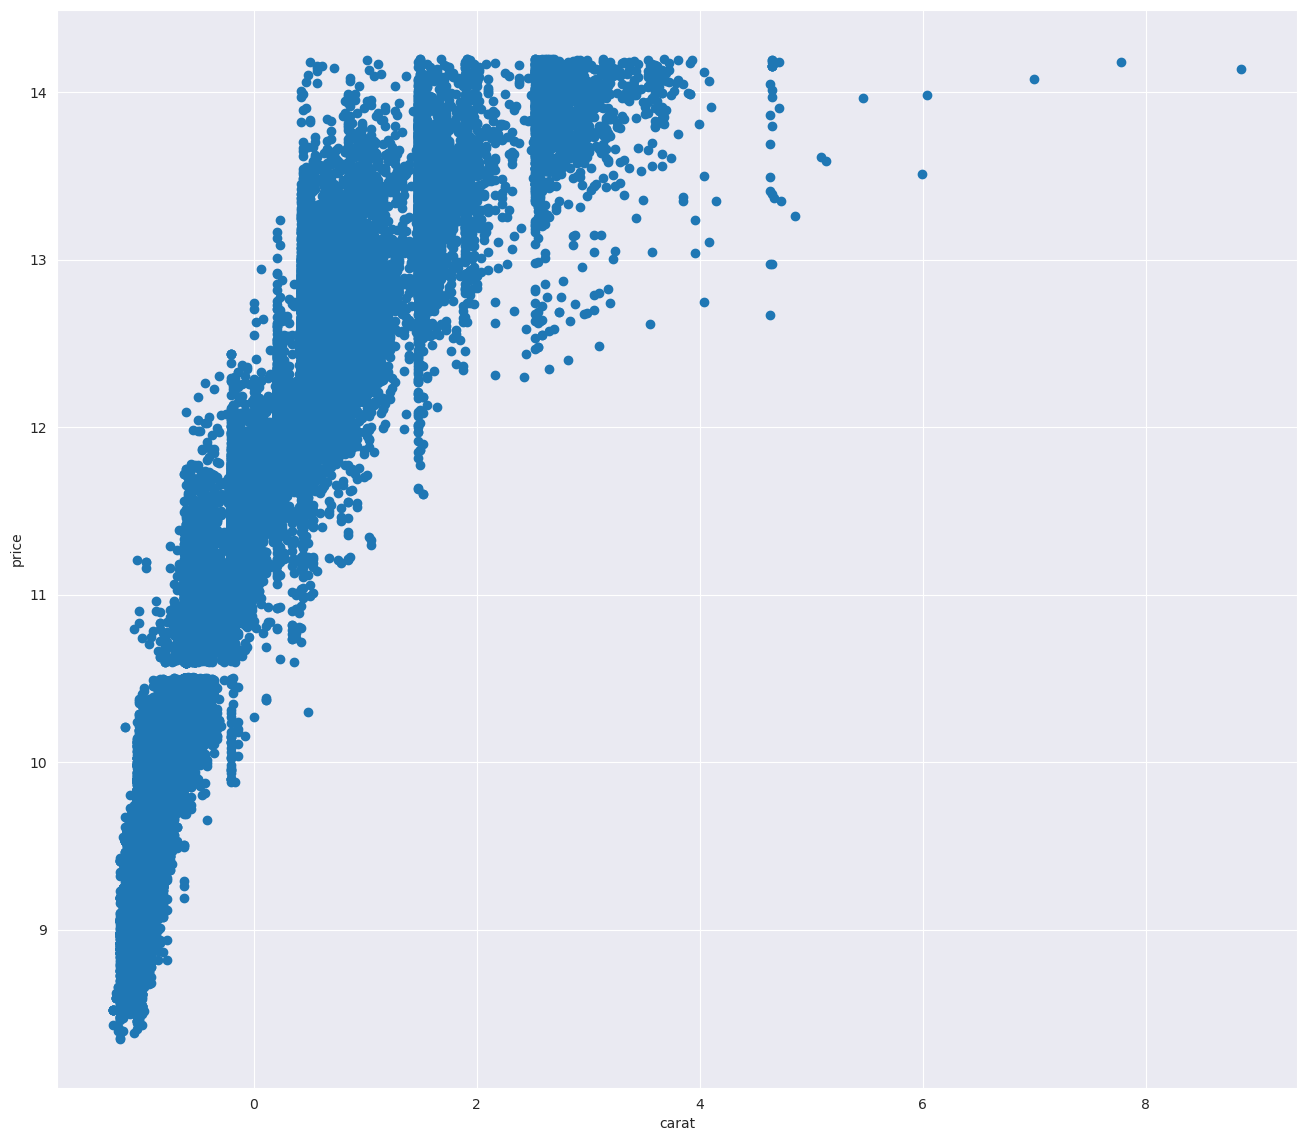

In [120]:
snb.set_style('darkgrid')  # stijl grafiek
plt.figure(figsize=(16,14))
# 1ste kolom van train set is [:,0], want is een numpy matrix
axes = plt.axes()
axes.scatter(train_X_tf[:,0],train_y_tf)
axes.set_xlabel('carat')
axes.set_ylabel('price')
plt.show()

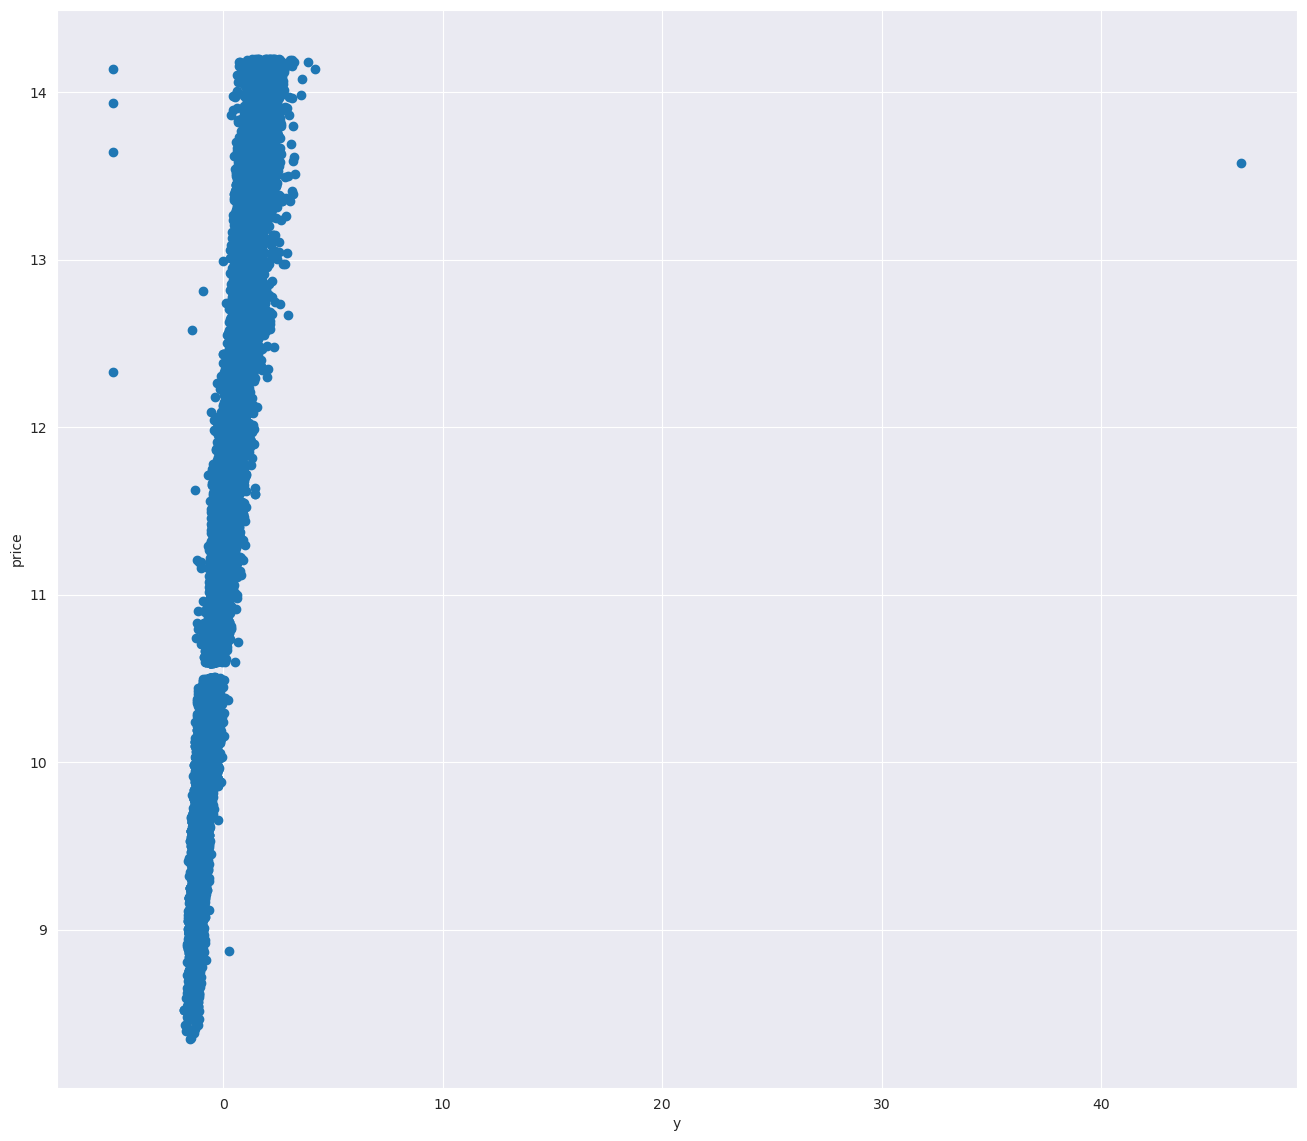

In [121]:
snb.set_style('darkgrid')  # stijl grafiek
plt.figure(figsize=(16,14))
# 1ste kolom van train set is [:,0], want is een numpy matrix
axes = plt.axes()
axes.scatter(train_X_tf[:,1],train_y_tf)
axes.set_xlabel('y')
axes.set_ylabel('price')
plt.show()

### leren van lineair, polynoom en decision tree model

<h4>Lineair model</h4>

In [122]:
# lineaire regressor object maken
lin_reg_tf = LinearRegression()
# fitten van de features (train_X)
lin_reg_tf.fit(train_X_tf,train_y_tf)
# lineaire vergelijking
# voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
y_pred_tf = lin_reg_tf.predict(train_X_tf)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
lin_mse_tf = mean_squared_error(y_pred_tf,train_y_tf)
# bepalen van RMSE (Root Mean Square Error)
lin_rmse_tf = np.sqrt(lin_mse_tf)
print('RMSE:',lin_rmse_tf)

RMSE: 0.502878487664442


In [123]:
print('Omrekenen naar prijswaarde:',2**lin_rmse_tf)

Omrekenen naar prijswaarde: 1.4170380401310996


<h4>Polynoom model</h4>

In [124]:
for d in range(2,11):
    # Polyfeature object maken
    poly_feats = PolynomialFeatures(degree=d,include_bias=False)
    train_X_poly = poly_feats.fit_transform(train_X_tf)
    # door een lineaire regressor sturen
    # lineaire regressor object maken
    lin_reg = LinearRegression()
    # fitten van de features (train_X)
    lin_reg.fit(train_X_poly,train_y_tf)
    # lineaire vergelijking
    # voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
    y_pred = lin_reg.predict(train_X_poly)
    # bepalen van Mean Square Error van de voorspelde tov de echte waarden
    lin_mse = mean_squared_error(y_pred,train_y_tf)
    # bepalen van RMSE (Root Mean Square Error)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE voor degree:',d,'is',lin_rmse)  

RMSE voor degree: 2 is 0.36811170495062473
RMSE voor degree: 3 is 0.3648270528265291
RMSE voor degree: 4 is 0.3645290052907004
RMSE voor degree: 5 is 0.36184524189248857
RMSE voor degree: 6 is 0.3614351278897168
RMSE voor degree: 7 is 0.36072816224958754
RMSE voor degree: 8 is 0.3607644381059537
RMSE voor degree: 9 is 0.4017952644963232
RMSE voor degree: 10 is 0.9626659260912565


<h4>Decision tree met min_sample_leaf = 64</h4>

In [125]:
tree_tf= DecisionTreeRegressor(min_samples_leaf=64)
tree_tf.fit(train_X_tf,train_y_tf)
# RMSE van leerset
pred_y_train = tree_tf.predict(train_X_tf)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_tf_train_mse = mean_squared_error(pred_y_train,train_y_tf)
# bepalen van RMSE (Root Mean Square Error)
tree_tf_train_rmse = np.sqrt(tree_tf_train_mse)
print('RMSE leerset:',tree_tf_train_rmse)

RMSE leerset: 0.35224117547622646


### Testen en valideren van de beste modellen

In [127]:
test_set_tf2,valid_set_tf = train_test_split(test_set_tf,test_size=0.4,random_state=42)
# random_state is randomseed voor de random functie
print('aantal entries in test_set:  ', len(test_set_tf2))
print('aantal entries in valid_set: ', len(valid_set_tf))
print('stukje inhoud test_set:')
test_set_tf2.head()

# transformeren van de testset
test_X_tf,test_y_tf,_ = preprocess_targetTf(test_set_tf2,['carat','y'],'price',dataProcess_tf)
print('features test_set:')
print(test_X_tf)
print('target')
print(test_y_tf[:20])

# transformeren van de validatieset
valid_X_tf,valid_y_tf,_ = preprocess_targetTf(valid_set_tf,['carat','y'],'price',dataProcess_tf)
print('features valid_set:')
print(valid_X_tf)
print('target')
print(valid_y_tf[:20])

aantal entries in test_set:   9709
aantal entries in valid_set:  6473
stukje inhoud test_set:
features test_set:
[[-0.54623754 -0.40888649]
 [-0.92474708 -1.02811396]
 [-0.56726585 -0.42632952]
 ...
 [-1.00886031 -1.10660758]
 [ 1.36733842  1.38774531]
 [ 0.42106459  0.59408757]]
target
[10.21310422  9.6617781  10.8587581   9.29462075  9.55458885 10.82892983
 10.48984796 10.27029533 11.01192607 10.02652344 12.12734954  9.86727874
 13.05968245  9.99435344 11.0721326  13.75749419 13.89035929 11.23182118
  9.4429435  11.72749507]
features valid_set:
[[-0.56726585 -0.4786586 ]
 [-0.56726585 -0.48738011]
 [-0.20978463  0.01846767]
 ...
 [ 0.46312121  0.65513817]
 [ 0.42106459  0.42837881]
 [ 0.7364892   0.90806206]]
target
[11.19229281 10.65015421 11.42992974  9.19721669  9.56224242 10.86495992
 11.53138146 11.72238064  9.86108691 11.87498135 13.28193003  9.64024494
 12.49210354 10.87728413 13.90491681 10.14338321 12.02894204  9.82972274
 12.05494342 13.09819661]


<h4>Testen valideren polynoom model</h4>